Initialisation data
torchvision dataset is images in range [0,1] we change it to [-1,1]

In [19]:
import torch
import torchvision
import torchvision.transforms as transforms

#Normalization image
transform = transforms.Compose(
  [transforms.ToTensor(),
  transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)
#Create a data set for training
trainset = torchvision.datasets.CIFAR10(root = './CIFAR10', train = True, 
                                       download = True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 4, 
                                         shuffle = True, num_workers = 2)
#Create a data set for test
testset = torchvision.datasets.CIFAR10(root = './CIFAR10', train = False, 
                                      download = True, transform = transform)

testloader = torch.utils.data.DataLoader(testset, batch_size = 4,
                                              shuffle = False, num_workers = 2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

0it [00:00, ?it/s]

170500096it [00:06, 26795828.24it/s]                               


Extracting ./CIFAR10/cifar-10-python.tar.gz to ./CIFAR10
Files already downloaded and verified


Review shape of tensor

In [20]:
print(type(trainset[0][0]))
print(trainset[0][0].size())

<class 'torch.Tensor'>
torch.Size([3, 32, 32])


Review image by matplotlib

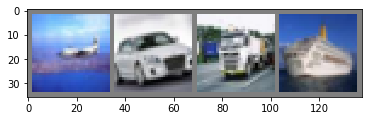

plane   car truck  ship


In [22]:
import matplotlib.pyplot as plt
import numpy as np

#functions to show an image

def imshow(img):
    img = img/ 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()

dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

Create architecture of neural network with 

```
# Ce texte est au format code
```



In [0]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
      def __init__(self):
          super(Net, self).__init__()
          self.conv1 = nn.Conv2d(3, 12, 5)
          self.pool = nn.MaxPool2d(2,2)
          self.conv2 = nn.Conv2d(12, 24, 5)
          self.fc1 = nn.Linear(24*5*5, 120)
          self.fc2 = nn.Linear(120, 64)
          self.fc3 = nn.Linear(64, 10)
      
      def forward(self, x):
          x = self.pool(F.relu(self.conv1(x)))
          x = self.pool(F.relu(self.conv2(x)))
          x = x.view(-1, 24* 5 * 5)
          x = F.relu(self.fc1(x))
          x = F.relu(self.fc2(x))
          x = self.fc3(x)
          return x

net = Net()

Determine loss function( cross-entropy and optimizer function(stochastic gradient descent)

In [0]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum = 0.1)

Training model

In [45]:
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader,0):
        # get the inputs, data is a list of [inputs, labels]
        inputs, labels = data

        #zero the parameter gradient
        optimizer.zero_grad()

        #forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' %(epoch + 1, i + 1, running_loss/2000))
            running_loss = 0.0
      
print('Finished Training')

[1,  2000] loss: 2.303
[1,  4000] loss: 2.299
[1,  6000] loss: 2.291
[1,  8000] loss: 2.266
[1, 10000] loss: 2.161
[1, 12000] loss: 2.054
[2,  2000] loss: 1.932
[2,  4000] loss: 1.890
[2,  6000] loss: 1.812
[2,  8000] loss: 1.770
[2, 10000] loss: 1.688
[2, 12000] loss: 1.641
Finished Training


Verification on the test set

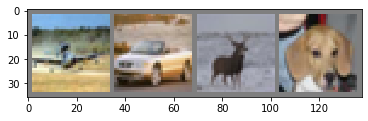

GroundTruth: plane   car  deer   dog


In [46]:
detaiter = iter(testloader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: {}'.format(' '.join('%5s' % classes[labels[j]] for j in range(4))))

In [47]:
outputs = net(images)
print(type(outputs))
print(outputs.shape)

<class 'torch.Tensor'>
torch.Size([4, 10])


In [48]:
_,  predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:  plane  ship  bird  frog


Result on test set

In [49]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 40 %
